In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

# Prepare and merge the datasets

In [3]:
# read app_sdk/app_sdk.csv
app_sdk = pd.read_csv('app_sdk/app_sdk.csv')
app_sdk = app_sdk.loc[:, ~app_sdk.columns.str.contains('^Unnamed')]
app_sdk

C:\Users\koenb\AppData\Local\Temp\ipykernel_17712\2216264927.py:2: DtypeWarning: Columns (2,3,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  app_sdk = pd.read_csv('app_sdk/app_sdk.csv')


,present,domains,user_agents,uninstall_date,deactivation_date,active,id,activation_date,install_date,sdk_name,sdk_type
0,False,NaN,NaN,2017-09-26,NaN,False,Ashes2010_androidmkp.indvseng,NaN,2015-12-29,AdColony,AD_NETWORK
1,True,adc3-launch.adcolony.com | events3.adcolony.co...,Dalvik/2.1.0 (Linux; U; Android 5.1.1; Android...,NaN,NaN,True,Ibtikar.Applications.Ibaloot,2017-11-05,2016-08-02,AdColony,AD_NETWORK
2,True,NaN,NaN,NaN,NaN,False,NoamStudios.Games.MegaTicTacToeFree,NaN,2018-03-15,AdColony,AD_NETWORK
3,True,NaN,NaN,NaN,NaN,False,abc.kids.preschool.learning.phonics.songs.videos,NaN,2018-05-10,AdColony,AD_NETWORK
4,True,NaN,NaN,NaN,NaN,False,abdelrahman.finddifferencegame2ar,NaN,2017-06-16,AdColony,AD_NETWORK
...,...,...,...,...,...,...,...,...,...,...,...
18562823,True,NaN,NaN,NaN,NaN,False,com.webmobi.climb2019,NaN,2018-10-22,Mobile Vision,DEV_TOOL
18562824,True,NaN,NaN,NaN,NaN,False,com.free.robux.get.robux,NaN,2018-10-19,Mobile Vision,DEV_TOOL
18562825,True,NaN,NaN,NaN,NaN,False,com.eminimeminim.venon,NaN,2018-10-06,Mobile Vision,DEV_TOOL
18562826,True,NaN,NaN,NaN,NaN,False,com.memoji.emojis,NaN,2018-10-09,Mobile Vision,DEV_TOOL


In [4]:
df_google_first = pd.read_csv('app_sdk/google_data_first.csv', encoding='ISO-8859-1')
df_google_first = df_google_first.loc[:, ~df_google_first.columns.str.contains('^Unnamed')]
df_google_first

,my_app_id,date_published,privacy_policy,rating_app,nb_rating,num_downloads,content_rating_app,developer,categ_app,in_app,...,nb_screenshots,description,whats_new,email_to,developer_info,similar_apps_top15,visit_website,more_from_developer,family_library,permissions
0,AOIC.AOIC_anb01,"September 13, 2012",NaN,3.0,2,100+ >,PEGI 3 Learn More,aoi-lab,Photography,False,...,3.0,The 1st release Cosplay Photo Album by Cosplay...,NaN,android@gmail.com,Visit website aoilab.android@gmail.com ...,"com.pomelogames.TowerGame, com.kodakalaris.kod...",http://www.aoi-lab.jp/,NaN,True,NaN
1,Adrenaline.Crew,"August 29, 2018",https://www.adrenalinecrew.com/information-on-...,3.7,155,"5,000+",PEGI 12 Moderate Violence,Adrenaline+Crew,Racing,True,...,3.0,"Race, stunt and fight your way across America ...",NaN,helper@adrenalinecrew.com,Visit website helper@adrenalinecrew.com ...,"com.timuzgames.stuntmaster, com.big.summerwheelie",http://www.adrenalinecrew.com,"com.adrenalinecrew.RSF2, ac.lite, com.assault,...",True,NaN
2,Alekseyt.Lusher,"January 24, 2015",NaN,4.3,"7,539","1,000,000+",PEGI 3 Learn More,Alekseyt,Entertainment,False,...,3.0,1948 A simple test Luscher. Luscher color test...,NaN,alekseyt9@gmail.com,"Visit website alekseyt9@gmail.com ,...","com.stakan4ik.root.stakan4ik_android, ua.igra_...",http://android_lusher_test.reformal.ru/,"com.Alekseyt.TronNet, alekseyt.islandlive, com...",False,"view network connections, full network acces..."
3,Alfasoft.Widgets.AustriaFlagAnalogClock,"January 7, 2014",NaN,NaN,NaN,10+,PEGI 3 Learn More,Alfasoft,Personalization,False,...,2.0,An Austria Flag Analog Clock Widget will show ...,NaN,alfioscuderi1978@gmail.com,alfioscuderi1978@gmail.com Via Vittorio Vene...,"sk.zdarma.nice.analog.clock, com.style_7.light...",NaN,"Alfasoft.Widgets.PsychedelicAnalogClock, com.a...",True,NaN
4,Alfasoft.Widgets.CroatiaFlagAnalogClock,"January 7, 2014",NaN,5.0,1,10+,PEGI 3 Learn More,Alfasoft,Personalization,False,...,2.0,A Croatia Flag Analog Clock Widget will show y...,NaN,alfioscuderi1978@gmail.com,alfioscuderi1978@gmail.com Via Vittorio Vene...,"com.style_7.lightanalogclocklw_7, sk.zdarma.ni...",NaN,"Alfasoft.Widgets.PsychedelicAnalogClock, com.a...",True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775897,zzsino.com.wifi.hemadynamometer,"December 18, 2017",http://blog.csdn.net/u010618194/article/detail...,NaN,NaN,50+,PEGI 3 Learn More,FSRK,Health & Fitness,False,...,4.0,1. This app passes the data to the app through...,NaN,NaN,ios@fs-rank.com Privacy Policy,"com.stepsappgmbh.stepsapp, ru.yandex.mail, com...",NaN,"com.fsrk.turgoscope, com.zzsino.fsrank.healthy...",False,"approximate location (network-based), precis..."
775898,zzsino.com.wifi.smartsocket,"January 30, 2018",http://blog.csdn.net/qq_35647115/article/detai...,2.3,24,"1,000+",PEGI 3 Learn More,FSRK,Tools,False,...,6.0,"Tomoko WiFi socket, mobile phone remote APP re...",NaN,NaN,ios@fs-rank.com Privacy Policy,"appinventor.ai_jasonmturner29.Radiocalc, com.o...",NaN,"com.fsrk.turgoscope, com.zzsino.fsrank.healthy...",False,"approximate location (network-based), precis..."
775899,zzsino.com.wifi.zzelectricblanket,"June 7, 2018",http://blog.csdn.net/OoODeng/article/details/7...,5.0,1,10+,PEGI 3 Learn More,FSRK,Health & Fitness,False,...,8.0,This product can provide you a more intelligen...,NaN,NaN,ios@fs-rank.com Privacy Policy,"com.runtastic.android.pro2, com.sportheroes.ru...",NaN,"com.fsrk.turgoscope, com.zzsino.fsrank.healthy...",False,"approximate location (network-based), precis..."
775900,zzy.heartEN,"March 9, 2015",http://www.catcap.cn/?page_id=856,4.0,"22,814","1,000,000+",PEGI 12 Sexual Innuendo,CatCap+Studio,Role Playing,True,...,12.0,The best love game of the year! Bring those pa...,NaN,googleplay@ariesgames.net,Visit website googleplay@ariesgames.net ...,"net.isitlove.cartercorp.matt, jp.ne.ambition.g...",http://www.ariesgames.net,"com.ariesgames.nuannuanEN, cn.catcap.ayc2en, c...",False,"retrieve running a

In [5]:
# join df_google_first and app_sdk on inner join with my_app_id and id
df = pd.merge(df_google_first, app_sdk, left_on='my_app_id', right_on='id', how='inner')

In [6]:
df.head(2)

,my_app_id,date_published,privacy_policy,rating_app,nb_rating,num_downloads,content_rating_app,developer,categ_app,in_app,...,domains,user_agents,uninstall_date,deactivation_date,active,id,activation_date,install_date,sdk_name,sdk_type
0,Alekseyt.Lusher,"January 24, 2015",NaN,4.3,"7,539","1,000,000+",PEGI 3 Learn More,Alekseyt,Entertainment,False,...,NaN,NaN,NaN,NaN,False,Alekseyt.Lusher,NaN,2015-01-24,Android Pay,DEV_TOOL
1,Alekseyt.Lusher,"January 24, 2015",NaN,4.3,"7,539","1,000,000+",PEGI 3 Learn More,Alekseyt,Entertainment,False,...,NaN,NaN,NaN,NaN,False,Alekseyt.Lusher,NaN,2015-01-24,Google Drive,DEV_TOOL


# Info and summary of dataset

In [7]:
def dataframe_summary(df):
    print(f"DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
    df_info = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-null Count': df.count(),
        'Null Count': df.isnull().sum(),
        'Null Percentage (%)': (df.isnull().sum() / len(df)) * 100
    })
    print(df_info)

# Run the function to get an enhanced summary of the DataFrame
dataframe_summary(df)

DataFrame contains 8422551 rows and 38 columns.

                    Data Type  Non-null Count  Null Count  Null Percentage (%)
my_app_id              object         8422551           0             0.000000
date_published         object         8422551           0             0.000000
privacy_policy         object         6076042     2346509            27.859837
rating_app            float64         8053783      368768             4.378341
nb_rating              object         8053783      368768             4.378341
num_downloads          object         8422371         180             0.002137
content_rating_app     object         8422551           0             0.000000
developer              object         8422550           1             0.000012
categ_app              object         8422550           1             0.000012
in_app                   bool         8422551           0             0.000000
has_ads                  bool         8422551           0             0.000000
pri

In [8]:
dataframe_summary(df_google_first)

DataFrame contains 775902 rows and 27 columns.

                    Data Type  Non-null Count  Null Count  Null Percentage (%)
my_app_id              object          775902           0             0.000000
date_published         object          775902           0             0.000000
privacy_policy         object          468898      307004            39.567368
rating_app            float64          702204       73698             9.498364
nb_rating              object          702204       73698             9.498364
num_downloads          object          775894           8             0.001031
content_rating_app     object          775902           0             0.000000
developer              object          775898           4             0.000516
categ_app              object          775898           4             0.000516
in_app                   bool          775902           0             0.000000
has_ads                  bool          775902           0             0.000000
pric

In [9]:
dataframe_summary(app_sdk)

DataFrame contains 18562828 rows and 11 columns.

                  Data Type  Non-null Count  Null Count  Null Percentage (%)
present                bool        18562828           0             0.000000
domains              object         1549435    17013393            91.653023
user_agents          object          344556    18218272            98.143839
uninstall_date       object         1349557    17213271            92.729788
deactivation_date    object          204658    18358170            98.897485
active                 bool        18562828           0             0.000000
id                   object        18562828           0             0.000000
activation_date      object         1763693    16799135            90.498791
install_date         object        18562828           0             0.000000
sdk_name             object        18562828           0             0.000000
sdk_type             object        18295203      267625             1.441725


In [10]:
# drop columns
df_new = df.drop(columns=[
    'id',
    'whats_new', 
    'privacy_policy', 
    'domains', 
    'user_agents', 
    'email_to', 
    'permissions',
    'software_version',
    'operating_system',
    'present',
])
    

In [11]:
dataframe_summary(df_new)

DataFrame contains 8422551 rows and 28 columns.

                    Data Type  Non-null Count  Null Count  Null Percentage (%)
my_app_id              object         8422551           0             0.000000
date_published         object         8422551           0             0.000000
rating_app            float64         8053783      368768             4.378341
nb_rating              object         8053783      368768             4.378341
num_downloads          object         8422371         180             0.002137
content_rating_app     object         8422551           0             0.000000
developer              object         8422550           1             0.000012
categ_app              object         8422550           1             0.000012
in_app                   bool         8422551           0             0.000000
has_ads                  bool         8422551           0             0.000000
price_gplay            object         8033359      389192             4.620833
int

## App Lifecycle

In [12]:
from datetime import timedelta


# Convert dates with format 'mixed' to handle various date formats
df_new['activation_date'] = pd.to_datetime(df_new['activation_date'], errors='coerce')
df_new['deactivation_date'] = pd.to_datetime(df_new['deactivation_date'], errors='coerce')
df_new['date_published'] = pd.to_datetime(df_new['date_published'], errors='coerce')
df_new['install_date'] = pd.to_datetime(df_new['install_date'], errors='coerce')
df_new['uninstall_date'] = pd.to_datetime(df_new['uninstall_date'], errors='coerce')

In [13]:
# Define time windows for analysis
time_window_before = timedelta(days=30)
time_window_after = timedelta(days=30)

In [14]:
# Filter rows with activation and deactivation dates
df_with_activation = df_new.dropna(subset=['activation_date'])
df_with_deactivation = df_new.dropna(subset=['deactivation_date'])

In [15]:
print("Columns in df_new:", df_new.columns)


Columns in df_new: Index(['my_app_id', 'date_published', 'rating_app', 'nb_rating',
       'num_downloads', 'content_rating_app', 'developer', 'categ_app',
       'in_app', 'has_ads', 'price_gplay', 'interactive_element',
       'in_app_product', 'developer_name', 'nb_screenshots', 'description',
       'developer_info', 'similar_apps_top15', 'visit_website',
       'more_from_developer', 'family_library', 'uninstall_date',
       'deactivation_date', 'active', 'activation_date', 'install_date',
       'sdk_name', 'sdk_type'],
      dtype='object')


C:\Users\koenb\AppData\Local\Temp\ipykernel_17712\3563345150.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'After Activation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_new.loc[(pd.notnull(df_new['activation_date']) &


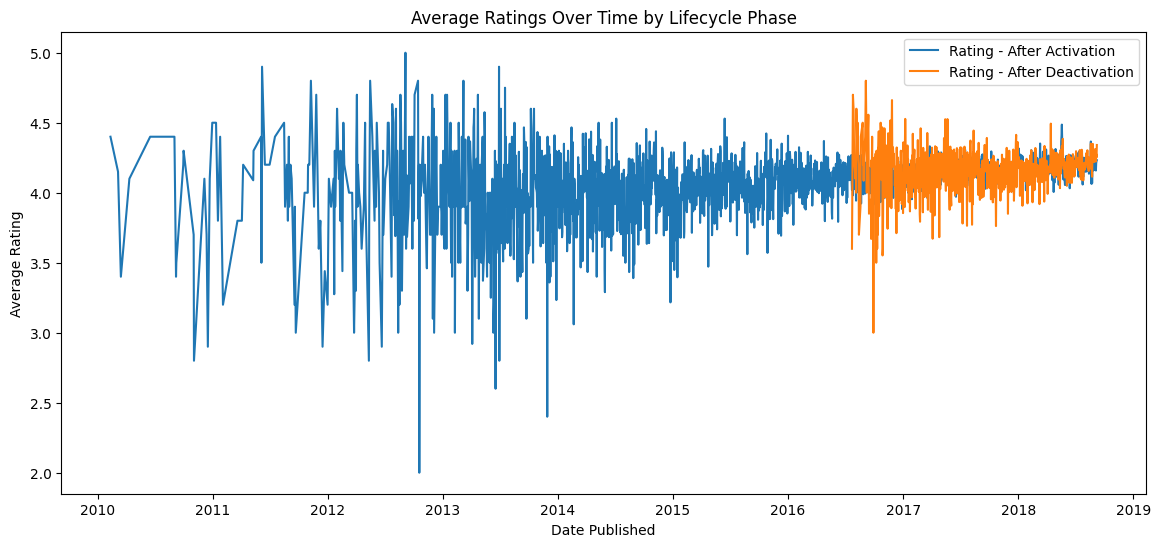

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert dates to datetime if not already done
df_new['install_date'] = pd.to_datetime(df_new['install_date'], errors='coerce')
df_new['activation_date'] = pd.to_datetime(df_new['activation_date'], errors='coerce')
df_new['deactivation_date'] = pd.to_datetime(df_new['deactivation_date'], errors='coerce')
df_new['date_published'] = pd.to_datetime(df_new['date_published'], errors='coerce')

# Ensure 'num_downloads' and 'rating_app' are numeric
df_new['num_downloads'] = df_new['num_downloads'].str.replace(',', '', regex=True).str.replace('+', '', regex=False)
df_new['num_downloads'] = pd.to_numeric(df_new['num_downloads'], errors='coerce')
df_new['rating_app'] = pd.to_numeric(df_new['rating_app'], errors='coerce')

# Use vectorized operations to add a 'phase' column to identify lifecycle stages
df_new['phase'] = np.nan

# Set 'After Activation' phase
df_new.loc[(pd.notnull(df_new['activation_date']) & 
            (df_new['date_published'] >= df_new['activation_date']) & 
            ((pd.isnull(df_new['deactivation_date'])) | (df_new['date_published'] < df_new['deactivation_date']))),
           'phase'] = 'After Activation'

# Set 'After Deactivation' phase
df_new.loc[(pd.notnull(df_new['deactivation_date']) & 
            (df_new['date_published'] >= df_new['deactivation_date'])),
           'phase'] = 'After Deactivation'

# Filter to keep only rows with a valid phase
df_phased = df_new.dropna(subset=['phase'])

# Group by date and phase, then calculate average downloads and ratings for each date and phase
df_aggregated = df_phased.groupby(['date_published', 'phase'])[['num_downloads', 'rating_app']].mean().reset_index()

# Plot ratings over time
plt.figure(figsize=(14, 6))

for phase in df_aggregated['phase'].unique():
    phase_data = df_aggregated[df_aggregated['phase'] == phase]
    plt.plot(phase_data['date_published'], phase_data['rating_app'], label=f'Rating - {phase}')

plt.title('Average Ratings Over Time by Lifecycle Phase')
plt.xlabel('Date Published')
plt.ylabel('Average Rating')
plt.legend()
plt.show()


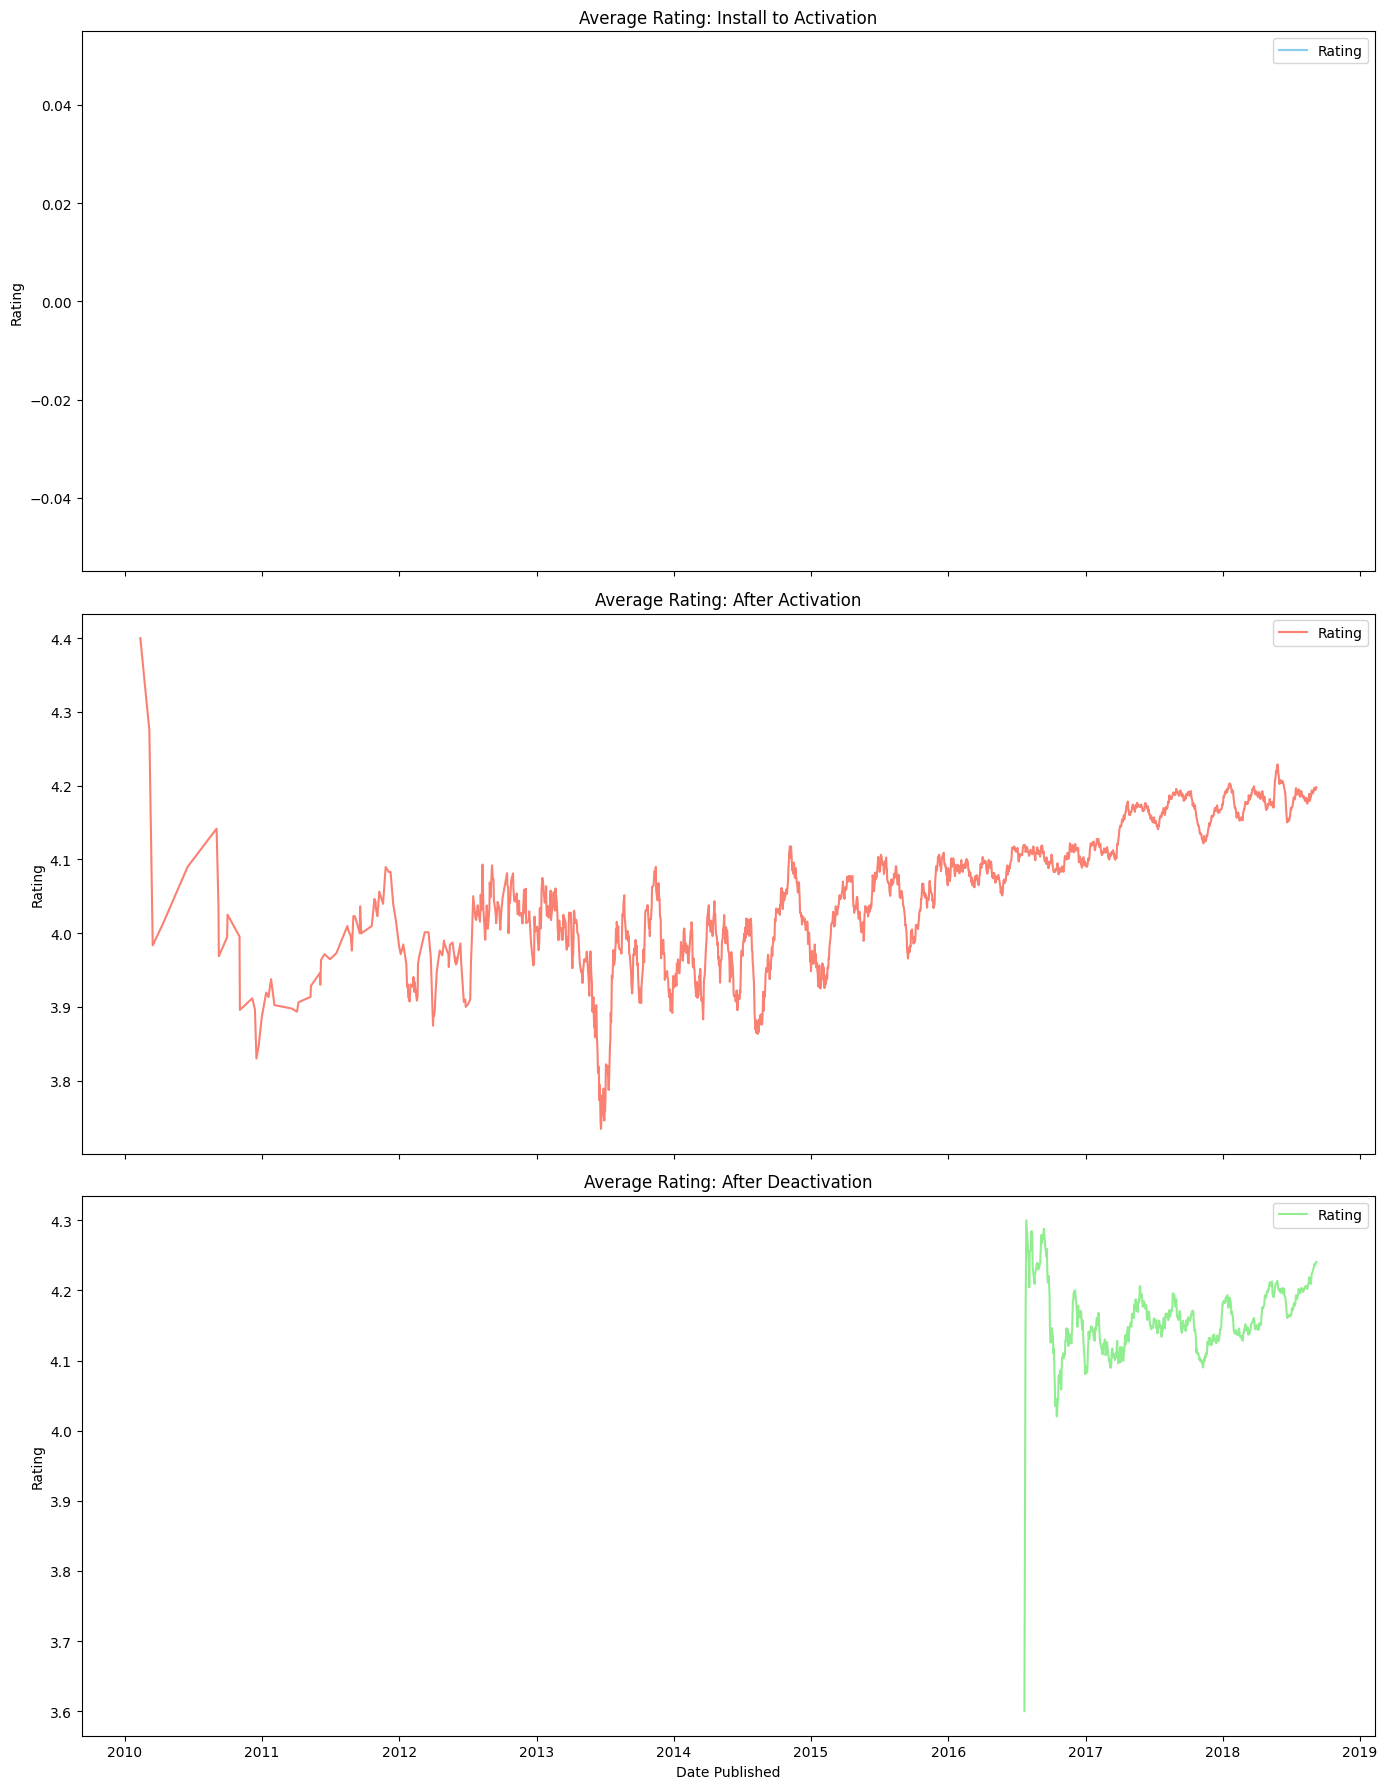

In [18]:
import matplotlib.pyplot as plt

# Set up a rolling window size (e.g., 30 days) to smooth the data
rolling_window = 30

# Apply rolling average for each phase
df_aggregated['smoothed_num_downloads'] = df_aggregated.groupby('phase')['num_downloads'].transform(lambda x: x.rolling(rolling_window, min_periods=1).mean())
df_aggregated['smoothed_rating_app'] = df_aggregated.groupby('phase')['rating_app'].transform(lambda x: x.rolling(rolling_window, min_periods=1).mean())

# Separate data for each phase
install_to_activation_data = df_aggregated[df_aggregated['phase'] == 'Install to Activation']
after_activation_data = df_aggregated[df_aggregated['phase'] == 'After Activation']
after_deactivation_data = df_aggregated[df_aggregated['phase'] == 'After Deactivation']

# Plot smoothed ratings
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot smoothed ratings
axes[0].plot(install_to_activation_data['date_published'], install_to_activation_data['smoothed_rating_app'], label='Rating', color='skyblue')
axes[0].set_title('Average Rating: Install to Activation')
axes[0].set_ylabel('Rating')
axes[0].legend()

axes[1].plot(after_activation_data['date_published'], after_activation_data['smoothed_rating_app'], label='Rating', color='salmon')
axes[1].set_title('Average Rating: After Activation')
axes[1].set_ylabel('Rating')
axes[1].legend()

axes[2].plot(after_deactivation_data['date_published'], after_deactivation_data['smoothed_rating_app'], label='Rating', color='lightgreen')
axes[2].set_title('Average Rating: After Deactivation')
axes[2].set_ylabel('Rating')
axes[2].legend()

plt.xlabel('Date Published')
plt.tight_layout()
plt.show()


C:\Users\koenb\AppData\Local\Temp\ipykernel_17712\2232736953.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_activation_data['month'] = after_activation_data['date_published'].dt.to_period('M')
C:\Users\koenb\AppData\Local\Temp\ipykernel_17712\2232736953.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_deactivation_data['month'] = after_deactivation_data['date_published'].dt.to_period('M')


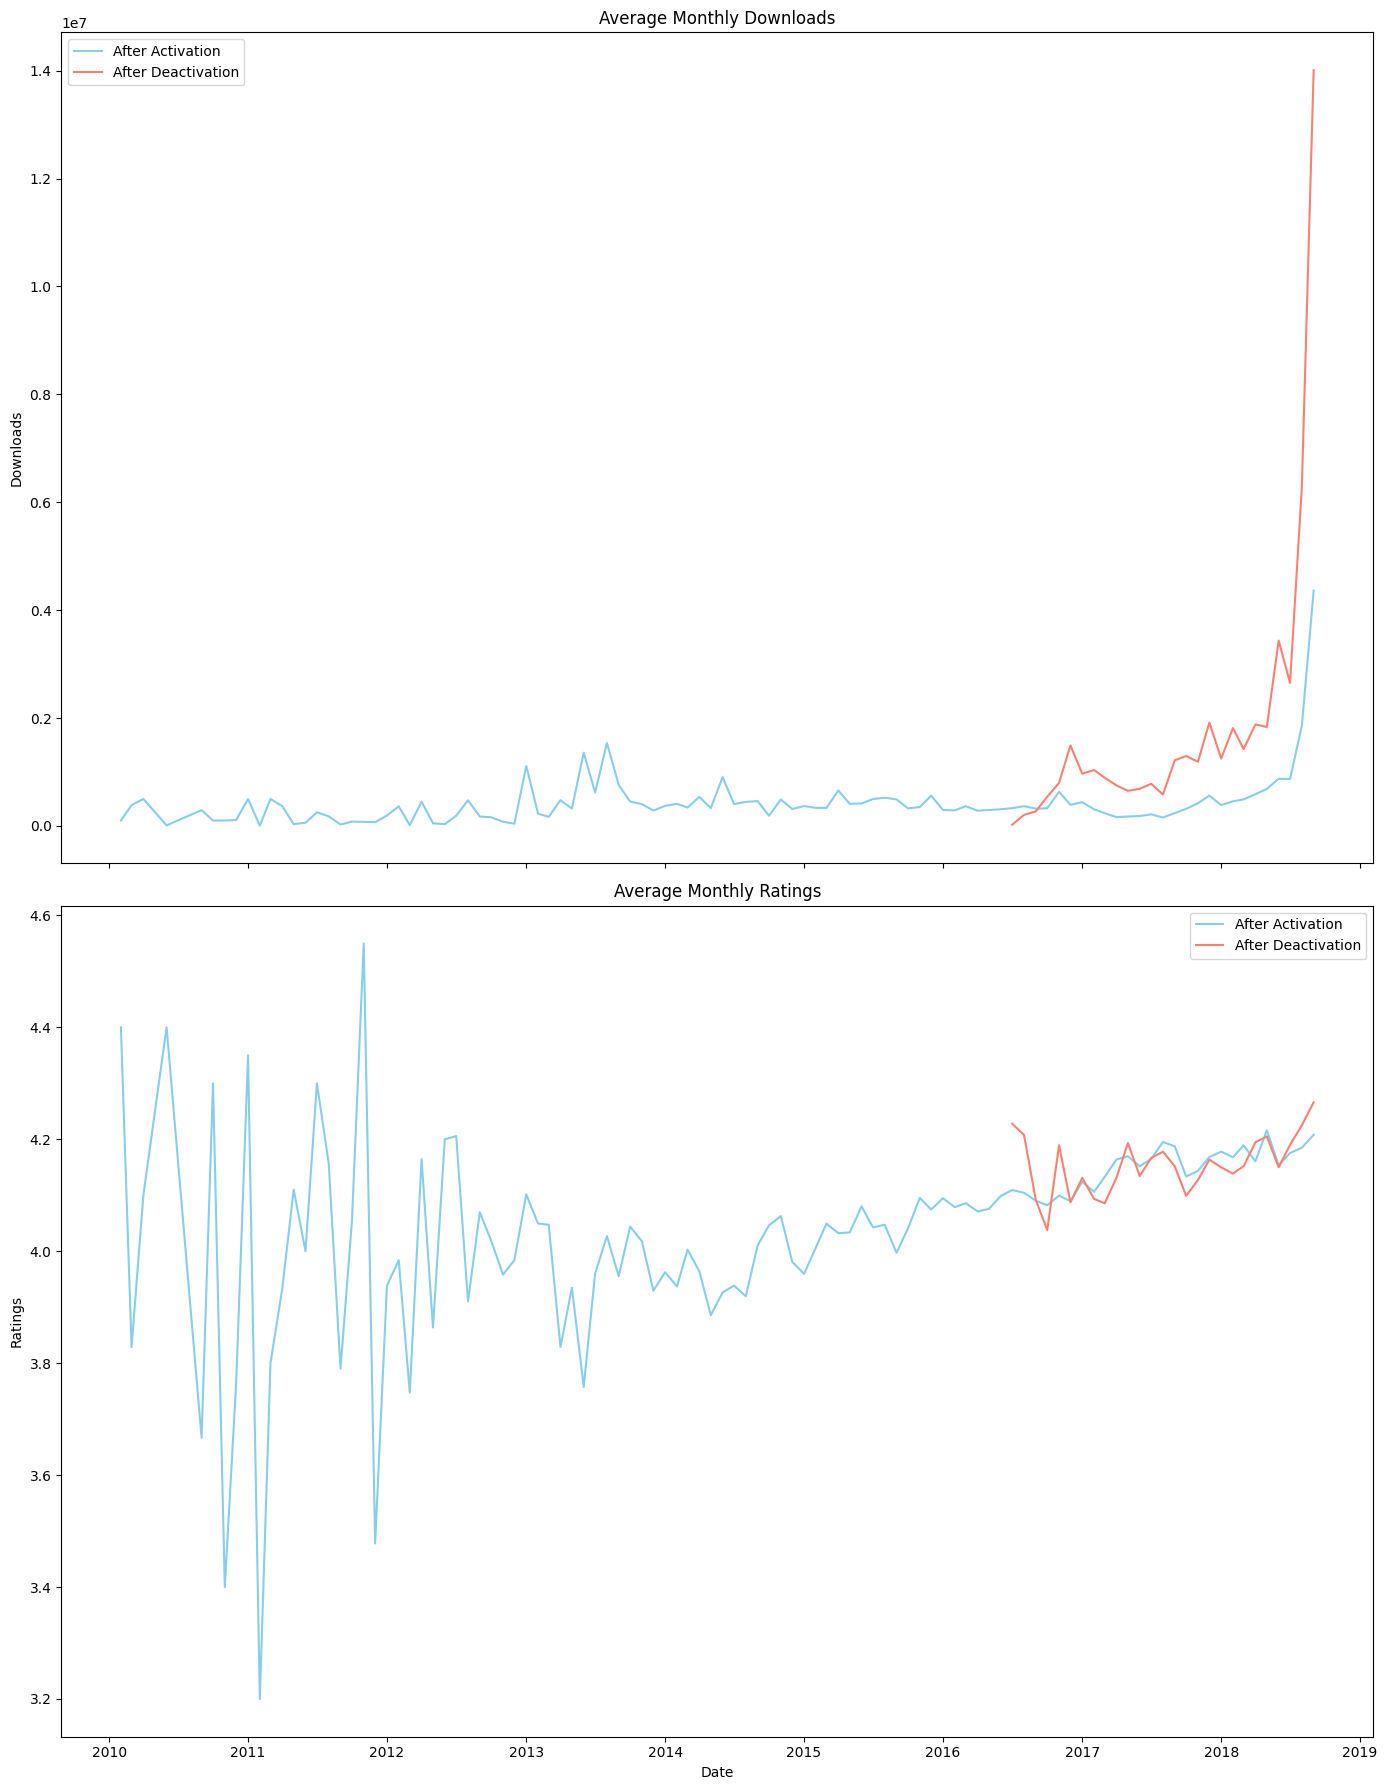

In [21]:
import matplotlib.pyplot as plt

# Convert 'visit_website' to a numeric type if needed
df_new['visit_website'] = pd.to_numeric(df_new['visit_website'], errors='coerce')

# Filter data for "After Activation" and "After Deactivation" phases
after_activation_data = df_new[(df_new['date_published'] >= df_new['activation_date']) &
                               ((df_new['deactivation_date'].isna()) | (df_new['date_published'] < df_new['deactivation_date']))]

after_deactivation_data = df_new[(df_new['deactivation_date'].notna()) & 
                                 (df_new['date_published'] >= df_new['deactivation_date'])]

# Aggregate data by month to smooth out fluctuations
after_activation_data['month'] = after_activation_data['date_published'].dt.to_period('M')
after_deactivation_data['month'] = after_deactivation_data['date_published'].dt.to_period('M')

# Calculate monthly averages for each metric in both phases
activation_monthly = after_activation_data.groupby('month')[['num_downloads', 'rating_app', 'visit_website']].mean()
deactivation_monthly = after_deactivation_data.groupby('month')[['num_downloads', 'rating_app', 'visit_website']].mean()

# Plot the time series for each metric
fig, axes = plt.subplots(2, 1, figsize=(14, 18), sharex=True)

# Plot num_downloads
axes[0].plot(activation_monthly.index.to_timestamp(), activation_monthly['num_downloads'], label='After Activation', color='skyblue')
axes[0].plot(deactivation_monthly.index.to_timestamp(), deactivation_monthly['num_downloads'], label='After Deactivation', color='salmon')
axes[0].set_title('Average Monthly Downloads')
axes[0].set_ylabel('Downloads')
axes[0].legend()

# Plot rating_app
axes[1].plot(activation_monthly.index.to_timestamp(), activation_monthly['rating_app'], label='After Activation', color='skyblue')
axes[1].plot(deactivation_monthly.index.to_timestamp(), deactivation_monthly['rating_app'], label='After Deactivation', color='salmon')
axes[1].set_title('Average Monthly Ratings')
axes[1].set_ylabel('Ratings')
axes[1].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [22]:
# Count non-null values for each column in the "After Activation" phase
print("After Activation Phase - Non-null counts:")
print(after_activation_data[['num_downloads', 'visit_website', 'rating_app']].notnull().sum())

# Count non-null values for each column in the "After Deactivation" phase
print("\nAfter Deactivation Phase - Non-null counts:")
print(after_deactivation_data[['num_downloads', 'visit_website', 'rating_app']].notnull().sum())


After Activation Phase - Non-null counts:
num_downloads    751323
visit_website         0
rating_app       798800
dtype: int64

After Deactivation Phase - Non-null counts:
num_downloads    160997
visit_website         0
rating_app       162151
dtype: int64


In [23]:
# Define time windows around activation
time_window = pd.Timedelta(days=30)

# Filter data within 30 days before and after activation
before_activation = df_new[(df_new['date_published'] >= df_new['activation_date'] - time_window) &
                           (df_new['date_published'] < df_new['activation_date'])]
after_activation = df_new[(df_new['date_published'] >= df_new['activation_date']) &
                          (df_new['date_published'] < df_new['activation_date'] + time_window)]

# Calculate average downloads and ratings before and after activation
avg_downloads_before = before_activation['num_downloads'].mean()
avg_downloads_after = after_activation['num_downloads'].mean()
avg_rating_before = before_activation['rating_app'].mean()
avg_rating_after = after_activation['rating_app'].mean()

print("Average Downloads Before Activation:", avg_downloads_before)
print("Average Downloads After Activation:", avg_downloads_after)
print("Average Rating Before Activation:", avg_rating_before)
print("Average Rating After Activation:", avg_rating_after)


Average Downloads Before Activation: 1723145.1612903227
Average Downloads After Activation: 307196.2008726709
Average Rating Before Activation: 4.251612903225807
Average Rating After Activation: 4.134215416749858


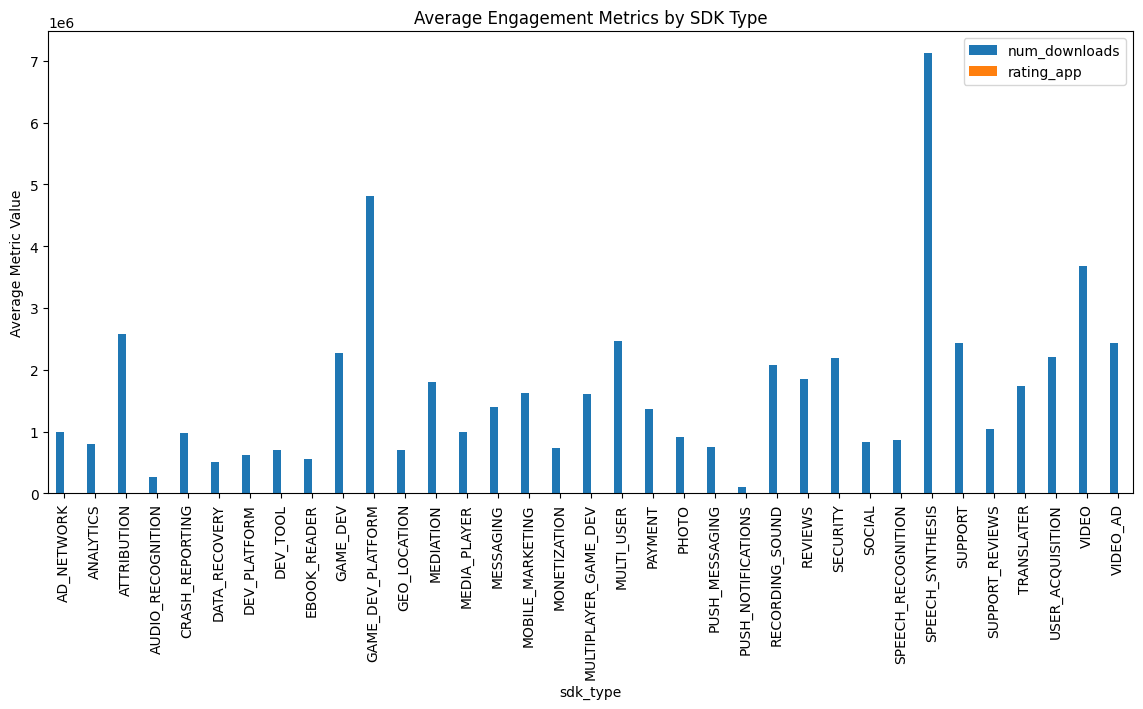

In [24]:
# Group by sdk_type and calculate average engagement metrics
sdk_type_engagement = df_new.groupby('sdk_type')[['num_downloads', 'rating_app']].mean()

# Plot the results
sdk_type_engagement.plot(kind='bar', figsize=(14, 6), title='Average Engagement Metrics by SDK Type')
plt.ylabel('Average Metric Value')
plt.show()


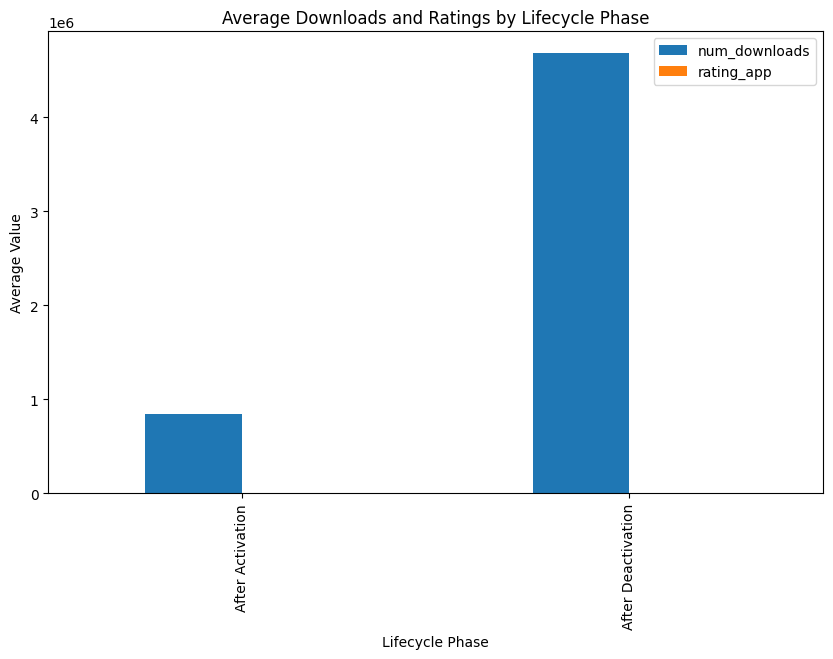

In [ ]:
# Calculate average downloads and ratings for each phase
phase_metrics = df_phased.groupby('phase')[['num_downloads', 'rating_app']].mean()

# Plot the results
phase_metrics.plot(kind='bar', figsize=(10, 6), title='Average Downloads and Ratings by Lifecycle Phase')
plt.ylabel('Average Value')
plt.xlabel('Lifecycle Phase')
plt.show()


In [26]:
# Define a time window (e.g., 30 days before and after activation/deactivation)
time_window = pd.Timedelta(days=30)

# Filter data within 30 days before activation
before_activation = df_new[(df_new['date_published'] >= df_new['activation_date'] - time_window) &
                           (df_new['date_published'] < df_new['activation_date'])]
after_activation = df_new[(df_new['date_published'] >= df_new['activation_date']) &
                          (df_new['date_published'] < df_new['activation_date'] + time_window)]
after_deactivation = df_new[(df_new['deactivation_date'].notnull()) &
                            (df_new['date_published'] >= df_new['deactivation_date']) &
                            (df_new['date_published'] < df_new['deactivation_date'] + time_window)]

# Calculate average downloads and ratings before and after activation/deactivation
avg_downloads_before = before_activation['num_downloads'].mean()
avg_downloads_after = after_activation['num_downloads'].mean()
avg_downloads_after_deactivation = after_deactivation['num_downloads'].mean()
avg_rating_before = before_activation['rating_app'].mean()
avg_rating_after = after_activation['rating_app'].mean()
avg_rating_after_deactivation = after_deactivation['rating_app'].mean()

print("Average Downloads Before Activation:", avg_downloads_before)
print("Average Downloads After Activation:", avg_downloads_after)
print("Average Downloads After Deactivation:", avg_downloads_after_deactivation)
print("Average Rating Before Activation:", avg_rating_before)
print("Average Rating After Activation:", avg_rating_after)
print("Average Rating After Deactivation:", avg_rating_after_deactivation)


Average Downloads Before Activation: 1723145.1612903227
Average Downloads After Activation: 307196.2008726709
Average Downloads After Deactivation: 1174277.358305479
Average Rating Before Activation: 4.251612903225807
Average Rating After Activation: 4.134215416749858
Average Rating After Deactivation: 4.137801177940389


C:\Users\koenb\AppData\Local\Temp\ipykernel_17712\3640031405.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trends = df_phased.set_index('date_published').groupby('phase')[['num_downloads', 'rating_app']].resample('M').mean().reset_index()


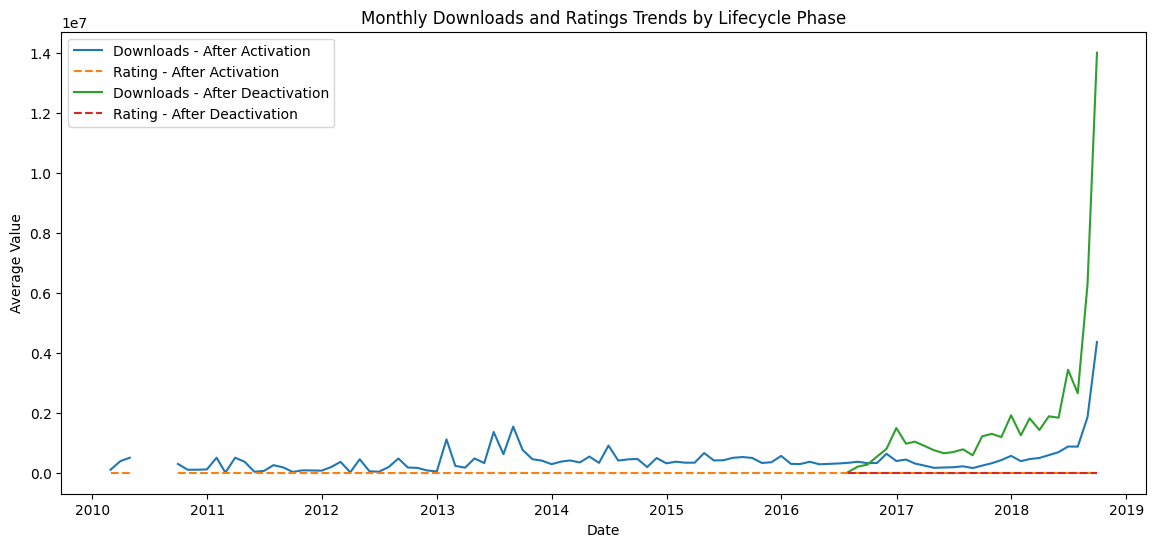

In [28]:
# Resample the data to monthly averages for each phase
monthly_trends = df_phased.set_index('date_published').groupby('phase')[['num_downloads', 'rating_app']].resample('M').mean().reset_index()

# Plot monthly trends by phase
plt.figure(figsize=(14, 6))
for phase in monthly_trends['phase'].unique():
    phase_data = monthly_trends[monthly_trends['phase'] == phase]
    plt.plot(phase_data['date_published'], phase_data['num_downloads'], label=f'Downloads - {phase}')
    plt.plot(phase_data['date_published'], phase_data['rating_app'], label=f'Rating - {phase}', linestyle='--')

plt.title('Monthly Downloads and Ratings Trends by Lifecycle Phase')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.legend()
plt.show()


# Distribution Published Apps

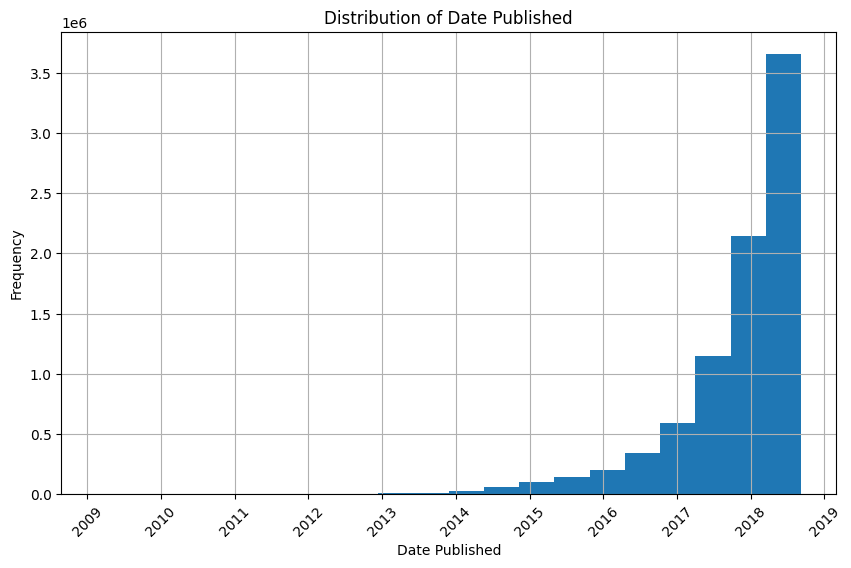

In [169]:
# histogram when apps are published
df_new['date_published'] = pd.to_datetime(df_new['date_published'])

# Plot histogram
df_new['date_published'].hist(bins=20, figsize=(10, 6))
plt.xlabel('Date Published')
plt.ylabel('Frequency')
plt.title('Distribution of Date Published')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# App Rating

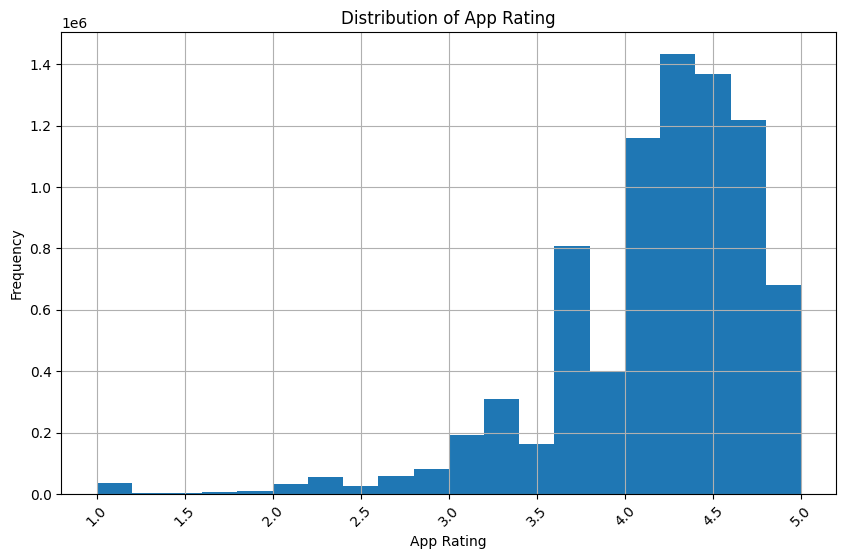

In [170]:
# Plot histogram
df_new['rating_app'].hist(bins=20, figsize=(10, 6))
plt.xlabel('App Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [171]:
# convert 76,545 to 76545
df_new['nb_rating'] = df_new['nb_rating'].str.replace(',', '')

df_new['nb_rating'] = pd.to_numeric(df_new['nb_rating'])
df_new['rating_app'] = pd.to_numeric(df_new['rating_app'])

# Calculate the global average rating across all apps
global_mean_rating = df_new['rating_app'].mean()

# Define a prior weight (m)
# This is the number of ratings at which the average rating is considered reliable.
# Adjust based on your data; higher values give more weight to the global mean.
m = 50

# Calculate Bayesian average for each app
df_new['bayesian_average'] = (global_mean_rating * m + df_new['rating_app'] * df_new['nb_rating']) / (m + df_new['nb_rating'])


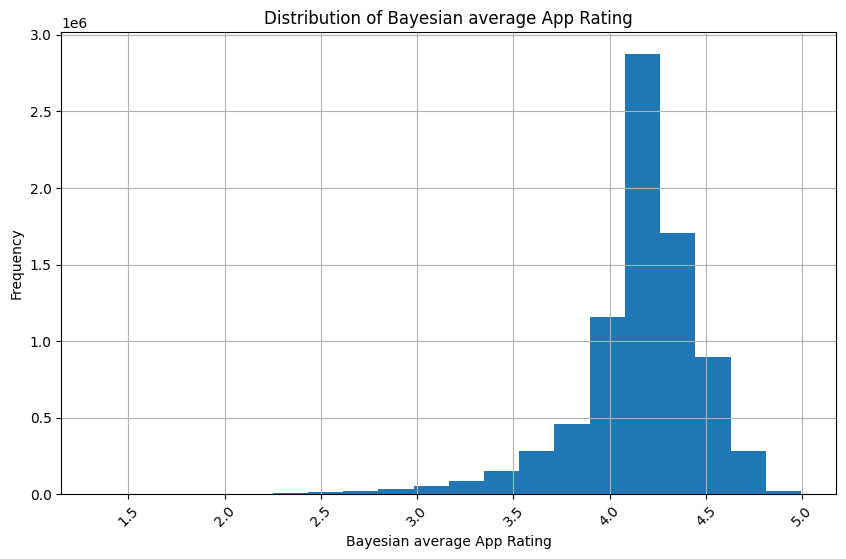

In [172]:
# Plot histogram
df_new['bayesian_average'].hist(bins=20, figsize=(10, 6))
plt.xlabel('Bayesian average App Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Bayesian average App Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Distribution of the Number of Downloads

In [173]:
# Function to clean and convert to numbers
def convert_to_numeric(value):
    if pd.isna(value):
        return np.nan
    else:
        # Remove ',' and '+' and '>' and strip any whitespace
        cleaned_value = value.replace(',', '').replace('+', '').replace('>', '').strip()
        return int(cleaned_value)

# Apply the function to the DataFrame column
df_new['num_downloads'] = df_new['num_downloads'].apply(convert_to_numeric)

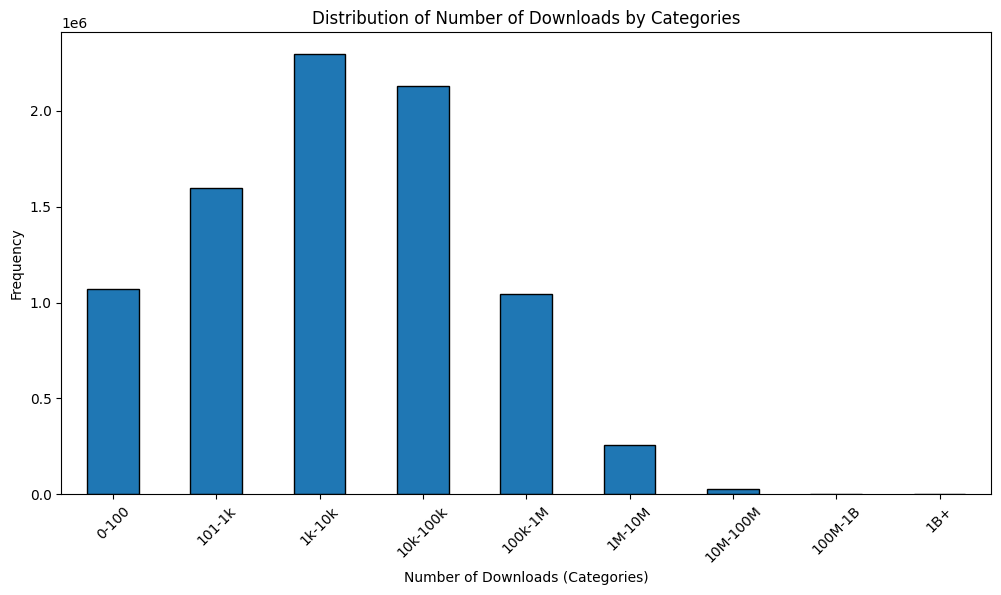

In [174]:
# Define the bins for categorization
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, np.inf]
labels = ['0-100', '101-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M-100M', '100M-1B', '1B+']

# Categorize num_downloads into these bins
df_new['downloads_category'] = pd.cut(df_new['num_downloads'], bins=bins, labels=labels)

# Plot the distribution of num_downloads categories
plt.figure(figsize=(12, 6))
df_new['downloads_category'].value_counts(sort=False).plot(kind='bar', edgecolor='black')
plt.xlabel('Number of Downloads (Categories)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Downloads by Categories')
plt.xticks(rotation=45)
plt.show()

# Pricing of the Apps

In [20]:
df['price_gplay'].value_counts()

price_gplay
0         8030601
£0.59         318
£0.79         269
£2.99         191
£0.89         179
£0.99         167
£1.99         149
£3.99         145
£1.79         111
£2.79         107
£4.99         101
£5.49          90
£4.39          87
£1.19          60
£1.49          54
£3.19          54
£2.59          53
£0.69          50
£3.49          44
£2.69          39
£1.29          36
£2.39          35
£1.39          34
£2.09          34
£8.99          32
£1.69          30
£2.89          30
£1.09          28
£2.29          24
£3.29          22
£3.69          20
£2.19          19
£9.99          17
£3.79          15
£2.49          14
2,99          14
£3.09          13
2,09          12
£0.50          11
£1.89          11
£2.51           8
£1.59           6
£29.99          6
£3.39           5
£6.57           4
£4.09           3
£1.00           3
£4.49           2
£13.99          1
£0.88           1
Name: count, dtype: int64

In [ ]:
df['date_published']

In [37]:
df = df.dropna(subset=['uninstall_date', 'date_published', 'deactivation_date'])

In [41]:
# Days between date published and deactivation date
df['activation_date'] = pd.to_datetime(df['activation_date'])
df['deactivation_date'] = pd.to_datetime(df['deactivation_date'])
df['days_active'] = (df['deactivation_date'] - df['activation_date']).dt.days

In [42]:
df[['activation_date', 'deactivation_date', 'days_active']].head()

,activation_date,deactivation_date,days_active
730,2017-01-12,2017-01-24,12
731,2017-01-12,2017-01-24,12
3787,2017-07-13,2017-11-21,131
4038,2017-05-17,2017-06-09,23
5609,2017-11-07,2017-12-28,51


In [23]:
df['in_app'].value_counts()

in_app
False    6639854
True     1782697
Name: count, dtype: int64

In [175]:
# Replace `£` with an empty string and handle any irregular character like '\x80'
df_new["price_gplay"] = (
    df_new["price_gplay"]
    .replace({"£": "", "\x80": ""}, regex=True)  # remove pound symbols and \x80
    .astype(str)
    .str.replace(",", ".")  # Handle cases where commas are used as decimal separators
    .astype(float)  # Convert to float
)

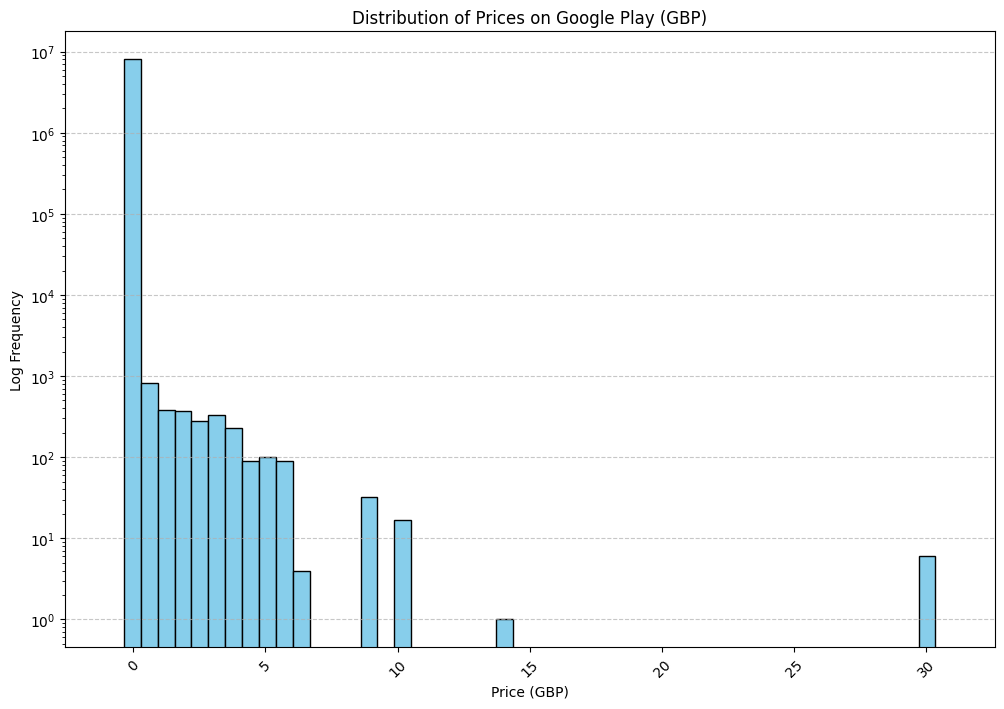

In [176]:
# Using a copy of the column and filling NaNs with a label for visualization
price_data = df_new["price_gplay"].dropna()  # Fill NaNs with -1 as a placeholder

plt.figure(figsize=(12, 8))
plt.hist(price_data, bins=50, edgecolor="black", color="skyblue", range=(-1, max(price_data) + 1))
plt.yscale("log")  # Log scale to better visualize frequencies

# Adding labels and title
plt.title("Distribution of Prices on Google Play (GBP)")
plt.xlabel("Price (GBP)")
plt.ylabel("Log Frequency")

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Content Ratings

In [177]:
# Applying the regex matching approach to the 'content_rating_app' column in df_content
df_rating = df_new

df_rating["content_rating_app"] = [
    match.group() if (match := re.match(r'PEGI (3|7|12|16|18)', item)) else item 
    for item in df_rating["content_rating_app"]
]


C:\Users\Kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


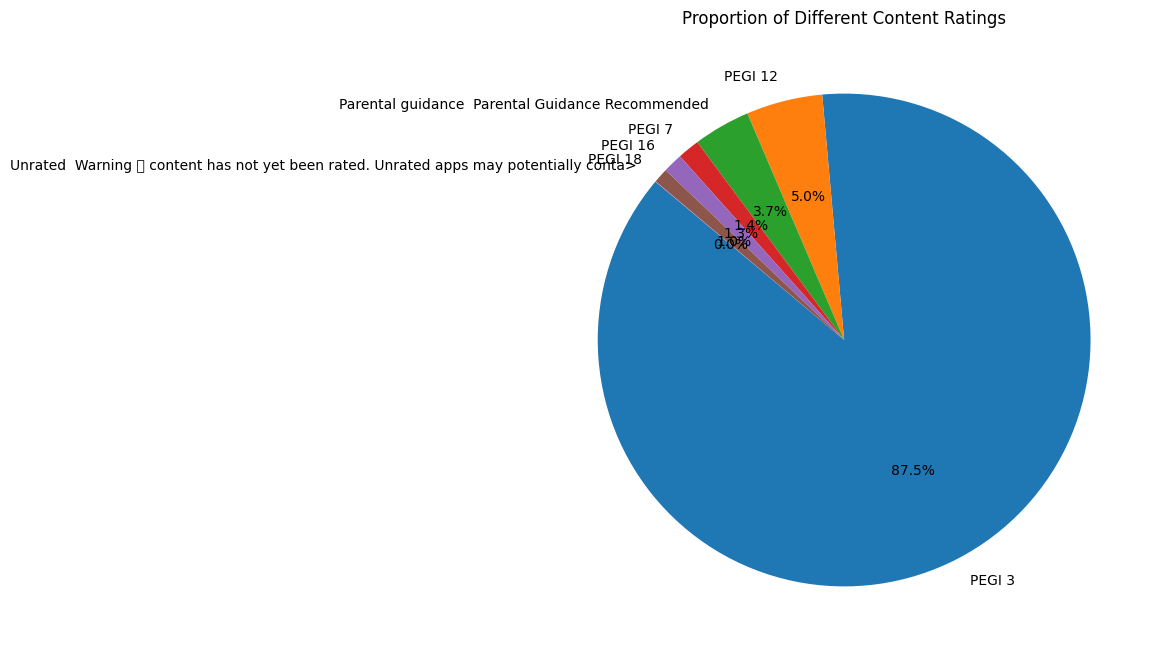

In [178]:
plt.figure(figsize=(8, 8))
content_rating_counts = df_rating["content_rating_app"].value_counts(normalize=True) * 100  # percentage
content_rating_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Different Content Ratings")
plt.ylabel("")  # Hide y-axis label for cleaner look
plt.show()

# Category of the apps

In [ ]:
df_new['categ_app'].value_counts()

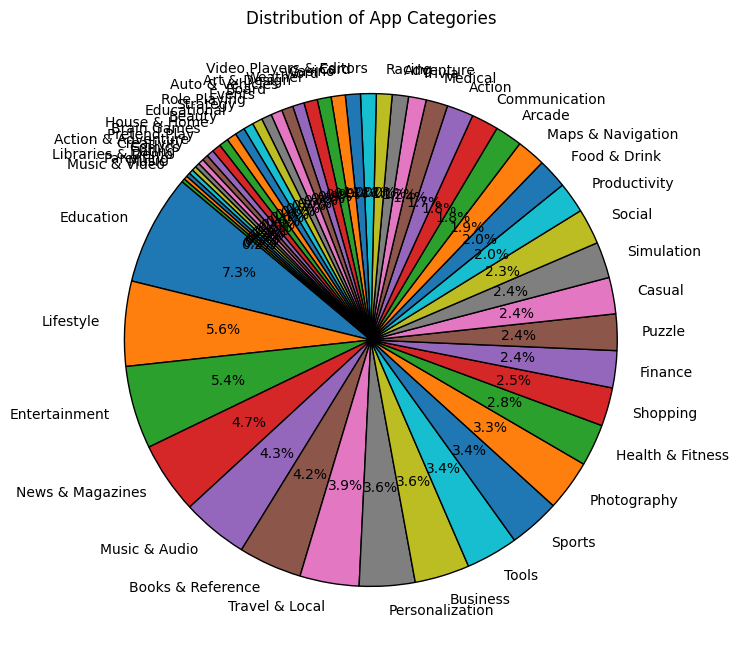

In [179]:
category_counts = df_new['categ_app'].value_counts()

plt.figure(figsize=(8, 8))

category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of App Categories")

plt.ylabel("")  # Hide y-axis label for cleaner look

plt.show()

# Ads and in-app purchases

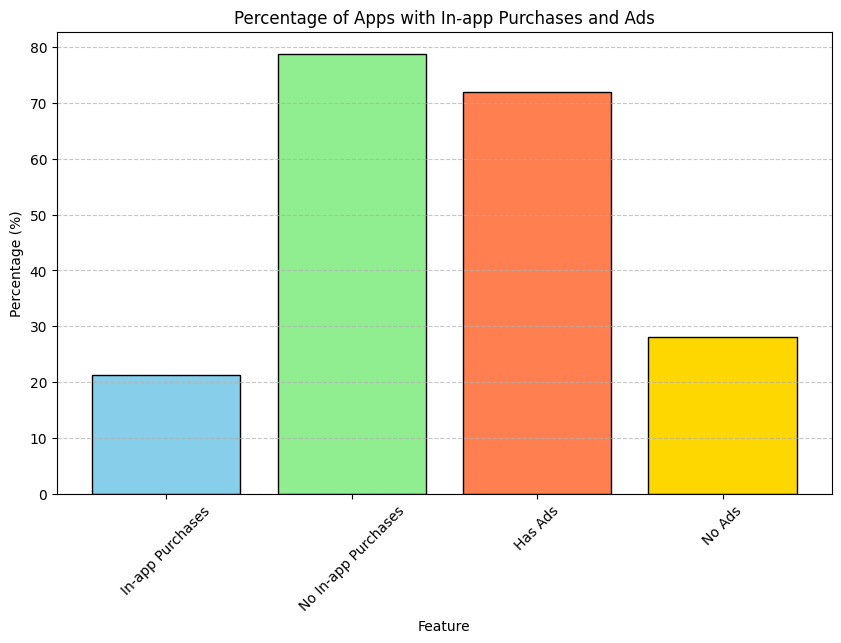

In [180]:
in_app_percentage = df_new["in_app"].value_counts(normalize=True) * 100
has_ads_percentage = df_new["has_ads"].value_counts(normalize=True) * 100

# Creating a DataFrame for plotting
percentage_data = pd.DataFrame({
    "Feature": ["In-app Purchases", "No In-app Purchases", "Has Ads", "No Ads"],
    "Percentage": [in_app_percentage[True], in_app_percentage[False], has_ads_percentage[True], has_ads_percentage[False]]
})



# Plotting the bar plot for percentages of apps with in-app purchases and ads
plt.figure(figsize=(10, 6))
plt.bar(percentage_data["Feature"], percentage_data["Percentage"], color=['skyblue', 'lightgreen', 'coral', 'gold'], edgecolor='black')
plt.title("Percentage of Apps with In-app Purchases and Ads")
plt.xlabel("Feature")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Family Library

In [8]:
df["family_library"].value_counts()

family_library
False    8419517
True        3034
Name: count, dtype: int64

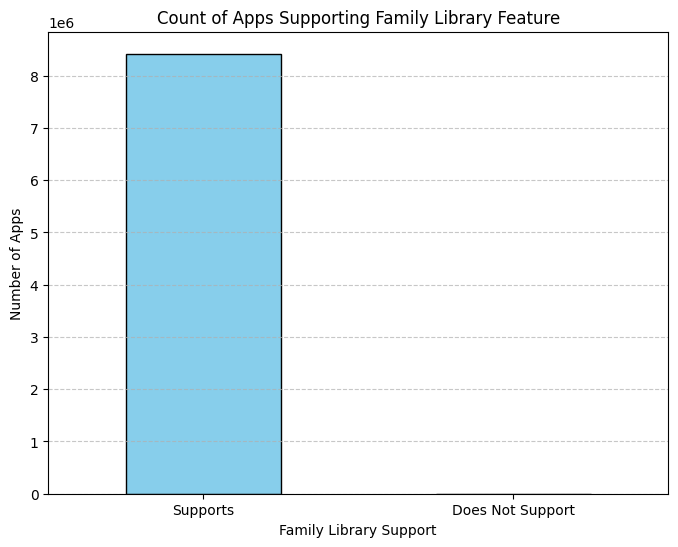

In [ ]:
family_library_counts = df_new["family_library"].value_counts()

# Plotting the count of apps supporting or not supporting the family library feature
plt.figure(figsize=(8, 6))
family_library_counts.plot(kind='bar', color=['skyblue', 'coral'], edgecolor='black')
plt.title("Count of Apps Supporting Family Library Feature")
plt.xlabel("Family Library Support")
plt.ylabel("Number of Apps")
plt.xticks([0, 1], labels=["Supports", "Does Not Support"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average Rating By Category

In [ ]:
df['categ_app'].value_counts()

53

<Figure size 1200x600 with 0 Axes>

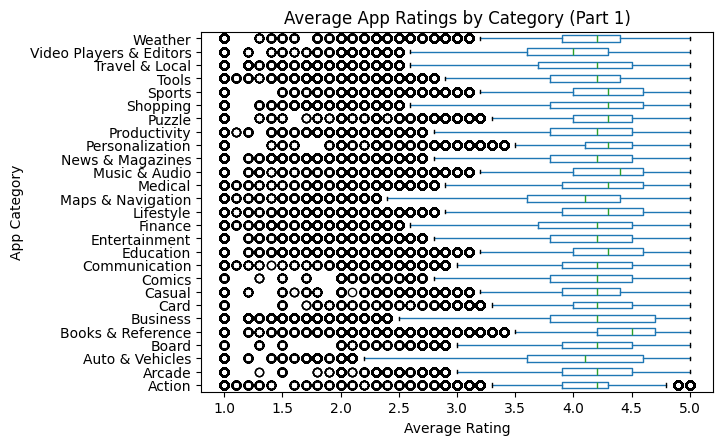

<Figure size 1200x600 with 0 Axes>

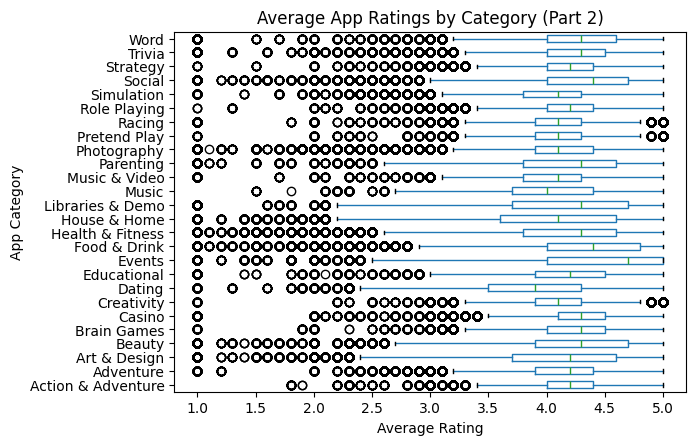

In [182]:
# Sample data setup for testing (since we don't have the original df_new DataFrame)
import numpy as np

# Creating a sample dataset similar to the one described
np.random.seed(42)  # For reproducibility

categories = df_new['categ_app'].unique()

ratings = np.random.uniform(1, 5, 1000)
categories_random = np.random.choice(categories, 1000)


# Splitting categories into two parts for better readability
unique_categories = df_new["categ_app"].unique()
midpoint = len(unique_categories) // 2
categories_part1 = unique_categories[:midpoint]
categories_part2 = unique_categories[midpoint:]

# Filtering data for each part
df_category_part1 = df_new[df_new["categ_app"].isin(categories_part1)]
df_category_part2 = df_new[df_new["categ_app"].isin(categories_part2)]

# Plotting box plot for average app ratings by category (Part 1)
plt.figure(figsize=(12, 6))
df_category_part1.boxplot(column="rating_app", by="categ_app", grid=False, vert=False)
plt.title("Average App Ratings by Category (Part 1)")
plt.suptitle("")  # Remove default title to keep it clean
plt.xlabel("Average Rating")
plt.ylabel("App Category")
plt.show()

# Plotting box plot for average app ratings by category (Part 2)
plt.figure(figsize=(12, 6))
df_category_part2.boxplot(column="rating_app", by="categ_app", grid=False, vert=False)
plt.title("Average App Ratings by Category (Part 2)")
plt.suptitle("")  # Remove default title to keep it clean
plt.xlabel("Average Rating")
plt.ylabel("App Category")
plt.show()


# SDK Type

5.629125902591745

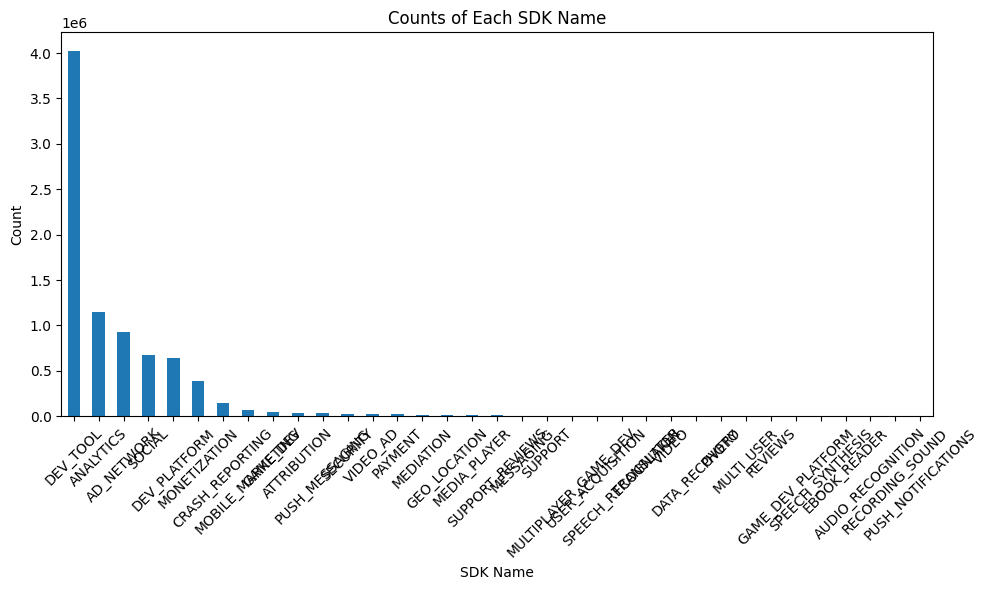

In [ ]:
# Plotting the counts of each SDK name
plt.figure(figsize=(10, 6))
df_new['sdk_type'].value_counts().plot(kind='bar')
plt.title("Counts of Each SDK Type")
plt.xlabel("SDK Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# number of downloads of free apps

In [ ]:
# drop nan values
df_new = df_new.dropna(subset=['price_gplay'])

In [ ]:
# Categorize as 'Free' if price is 0, otherwise 'Paid'
df_new['price_category'] = df_new['price_gplay'].apply(lambda x: 'Free' if x == 0 else 'Paid')


C:\Users\Kevin\AppData\Local\Temp\ipykernel_18060\145291287.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['price_category'] = df_new['price_gplay'].apply(lambda x: 'Free' if x == 0 else 'Paid')


,price_gplay,price_category
0,0.0,Free
1,0.0,Free
2,0.0,Free
3,0.0,Free
4,0.0,Free


In [ ]:
# Plotting the distribution of downloads by price category
plt.figure(figsize=(8, 6))
plt.bar(df_new['price_category'], df_new['num_downloads'], edgecolor='black')
plt.title('Distribution of Number of Downloads by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Number of Downloads')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [44]:
# Function to clean and convert to numbers
def convert_to_numeric(value):
    if pd.isna(value):
        return np.nan
    else:
        # Remove ',' and '+' and '>' and strip any whitespace
        cleaned_value = value.replace(',', '').replace('+', '').replace('>', '').strip()
        return int(cleaned_value)

# Apply the function to the DataFrame column
df['num_downloads'] = df['num_downloads'].apply(convert_to_numeric)



ValueError: List of boxplot statistics and `positions` values must have same the length

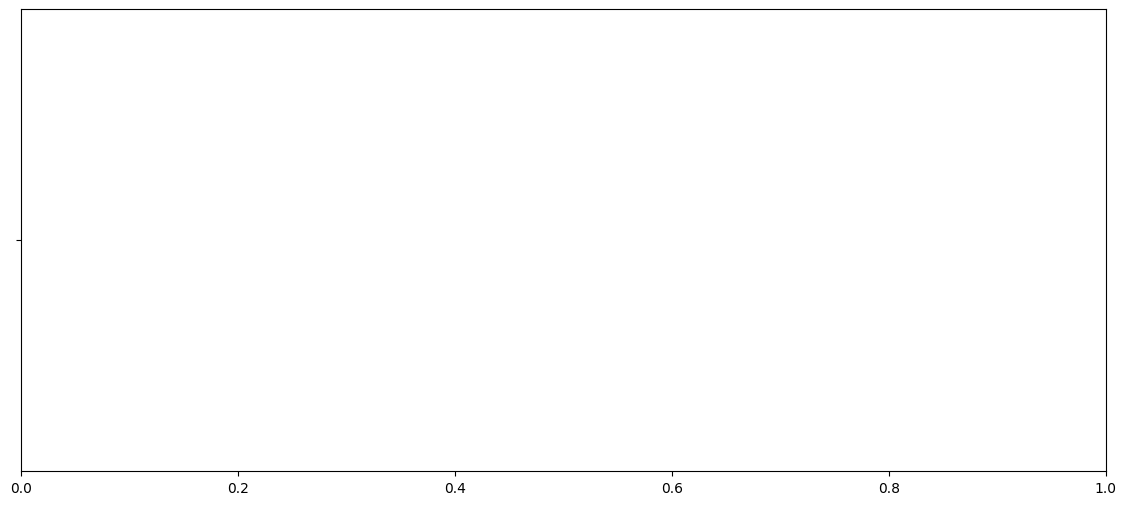

In [46]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Convert activation and deactivation dates to datetime
df['activation_date'] = pd.to_datetime(df['activation_date'])
df['deactivation_date'] = pd.to_datetime(df['deactivation_date'])
df['install_date'] = pd.to_datetime(df['install_date'])
df['uninstall_date'] = pd.to_datetime(df['uninstall_date'])
df['date_published'] = pd.to_datetime(df['date_published'])

# Set a time window (e.g., 30 days before and after activation/deactivation)
time_window = timedelta(days=30)

# Filter for rows where activation or deactivation data is available
df = df.dropna(subset=['activation_date', 'deactivation_date'])
# Analyze engagement metrics before and after SDK activation
df['pre_activation_downloads'] = df.apply(
    lambda x: df[(df['id'] == x['id']) & (df['date_published'] >= x['activation_date'] - time_window) &
                 (df['date_published'] < x['activation_date'])]['num_downloads'].mean(), axis=1)

df['post_activation_downloads'] = df.apply(
    lambda x: df[(df['id'] == x['id']) & (df['date_published'] >= x['activation_date']) &
                 (df['date_published'] < x['activation_date'] + time_window)]['num_downloads'].mean(), axis=1)

# Repeat for ratings if needed
df['pre_activation_ratings'] = df.apply(
    lambda x: df[(df['id'] == x['id']) & (df['date_published'] >= x['activation_date'] - time_window) &
                 (df['date_published'] < x['activation_date'])]['rating_app'].mean(), axis=1)

df['post_activation_ratings'] = df.apply(
    lambda x: df[(df['id'] == x['id']) & (df['date_published'] >= x['activation_date']) &
                 (df['date_published'] < x['activation_date'] + time_window)]['rating_app'].mean(), axis=1)

# Similar calculations for deactivation
df['pre_deactivation_downloads'] = df.apply(
    lambda x: df[(df['id'] == x['id']) & (df['date_published'] >= x['deactivation_date'] - time_window) &
                 (df['date_published'] < x['deactivation_date'])]['num_downloads'].mean(), axis=1)

df['post_deactivation_downloads'] = df.apply(
    lambda x: df[(df['id'] == x['id']) & (df['date_published'] >= x['deactivation_date']) &
                 (df['date_published'] < x['deactivation_date'] + time_window)]['num_downloads'].mean(), axis=1)

# Calculate differences in downloads and ratings before and after activation/deactivation
df['downloads_change_activation'] = df['post_activation_downloads'] - df['pre_activation_downloads']
df['ratings_change_activation'] = df['post_activation_ratings'] - df['pre_activation_ratings']

df['downloads_change_deactivation'] = df['post_deactivation_downloads'] - df['pre_deactivation_downloads']

# Visualize the changes
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='downloads_change_activation', color='lightblue')
plt.title('Change in Downloads Before and After SDK Activation')
plt.xlabel('Change in Downloads')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='downloads_change_deactivation', color='salmon')
plt.title('Change in Downloads Before and After SDK Deactivation')
plt.xlabel('Change in Downloads')
plt.show()

# # Further statistical analysis to test significance
# from scipy.stats import ttest_rel

# # Paired t-test for downloads before and after activation
# activation_downloads_ttest = ttest_rel(
#     df['pre_activation_downloads'].dropna(),
#     df['post_activation_downloads'].dropna()
# )

# # Paired t-test for downloads before and after deactivation
# deactivation_downloads_ttest = ttest_rel(
#     df['pre_deactivation_downloads'].dropna(),
#     df['post_deactivation_downloads'].dropna()
# )

# print("Activation Downloads T-Test:", activation_downloads_ttest)
# print("Deactivation Downloads T-Test:", deactivation_downloads_ttest)